In [31]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import  fetch_california_housing  as fh#加利福尼亚房价收集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

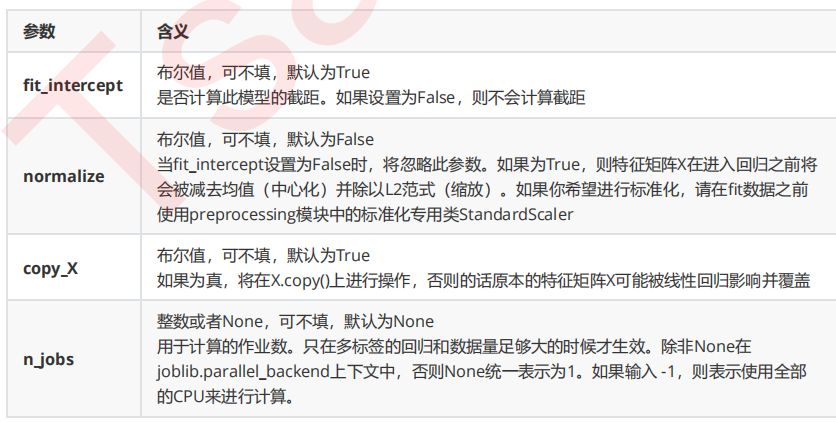

In [2]:
data=fh()

In [4]:
data.data.shape

(20640, 8)

In [5]:
X=pd.DataFrame(data.data)
Y=data.target

In [6]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
X.columns = data.feature_names

In [8]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=0,test_size=0.3)

In [10]:
for i in [Xtrain,Xtest]:
    i.index=range(i.shape[0])

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
reg=LR().fit(Xtrain,Ytrain)
Ytest_pre=reg.predict(Xtest)
reg.score(Xtest,Ytest)

0.5926087785518781

In [15]:
Ytest_pre

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

In [16]:
Ytest

array([1.369, 2.413, 2.007, ..., 3.519, 0.925, 2.983])

In [19]:
reg.coef_

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

In [21]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.44677397474198505),
 ('HouseAge', 0.009184099904557251),
 ('AveRooms', -0.1181167746949302),
 ('AveBedrms', 0.6422908791744335),
 ('Population', -9.370265069739975e-06),
 ('AveOccup', -0.004085359340971597),
 ('Latitude', -0.4090233123057439),
 ('Longitude', -0.4234195638425419)]

In [22]:
reg.intercept_

-36.01222888765237

In [25]:
reg_2=LR(fit_intercept=False).fit(Xtrain,Ytrain)
Ytest_pre=reg_2.predict(Xtest)
reg_2.score(Xtest,Ytest)

0.5199273101387702

### 模型效果如何R平方，MSE，交叉验证

In [35]:
reg_3=LR(normalize=True).fit(Xtrain,Ytrain)
Ytest_pre_3=reg.predict(Xtest)
reg_3.score(Xtest,Ytest)

0.5926087785518777

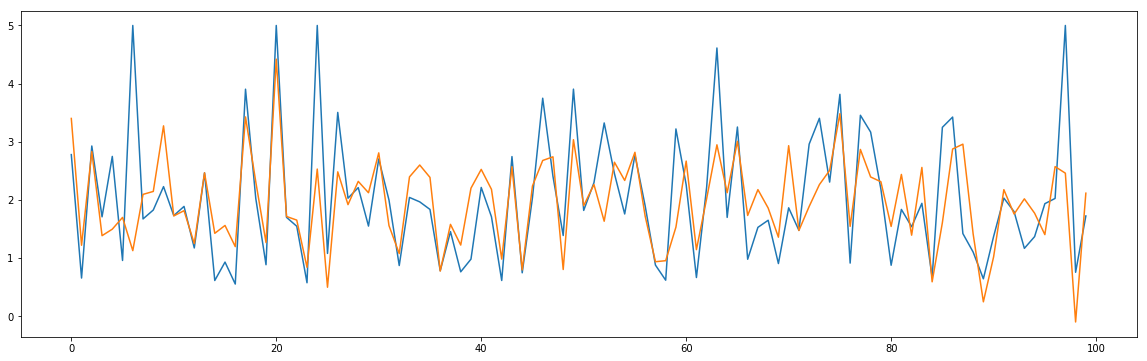

In [37]:
plt.figure(figsize=(20,6))
plt.plot(range(len(Ytest[50:150])),Ytest[50:150])
plt.plot(range(len(Ytest[50:150])),Ytest_pre_3[50:150])
plt.show()

In [38]:
reg_2.score?

In [40]:
from sklearn.metrics import mean_squared_error as MSE
MSE(Ytest_pre_3,Ytest)

0.5431489670037232

In [41]:
Ytest.mean() #根据MSE，每一个样本平均差距在0.5左右,非常大

2.0692859916020674

In [43]:
reg=LR()
cross_val_score(reg,X,Y,cv=10,scoring='mean_squared_error')#显示没有均方误差

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [44]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [50]:
reg=LR()
cross_val_score(reg,X,Y,cv=10,scoring='neg_mean_squared_error') #负均方误差

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [46]:
cross_val_score(reg,X,Y,cv=10,scoring='neg_mean_squared_error').mean()

-0.5509524296956602

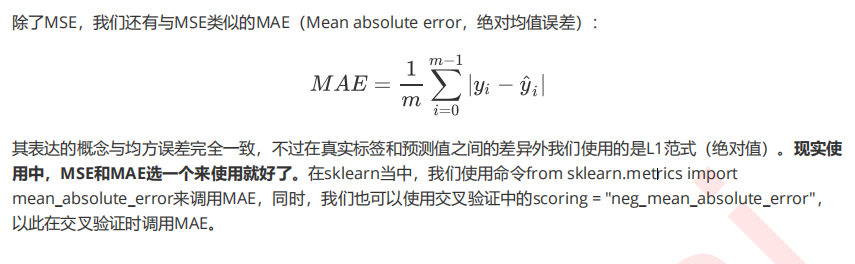

### 考虑是否过拟合

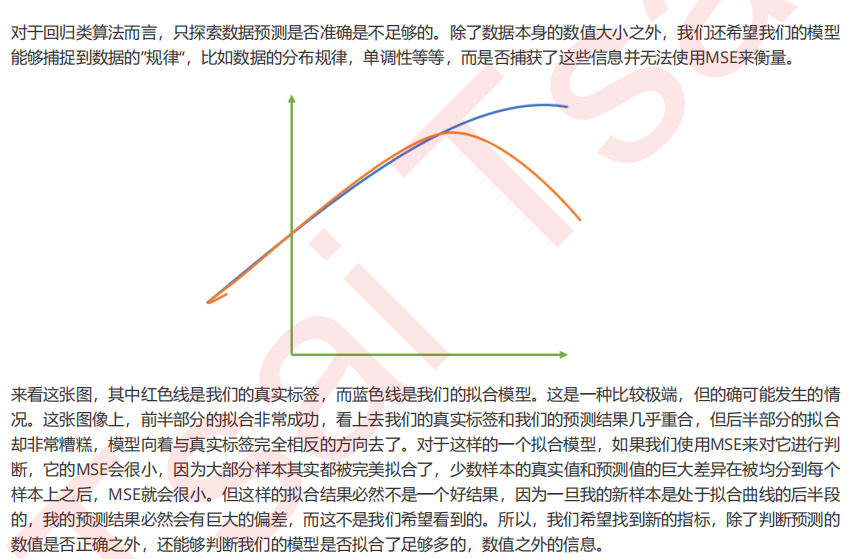

In [48]:
from sklearn.metrics import r2_score
r2_score(Ytest_pre_3,Ytest) #为什么分数不一样

0.3437780761431801

In [56]:
reg=LR()
r2 = reg.fit(Xtrain,Ytrain)
r2=r2.score(Xtest,Ytest)
r2

0.5926087785518781

In [58]:
#调用R2，和score其实一模一样
from sklearn.metrics import r2_score
r2_score(Ytest,Ytest_pre_3) #真实值在前，预测值在后

0.5926087785518781

In [83]:
#使用shift tab键来检查究竟哪个值先进行输入
r2_score(Ytest,Ytest_pre_3) #或者你也可以指定参数，就不必在意顺序了
r2_score(y_true = Ytest,y_pred = Ytest_pre_3)

0.5926087785518781

In [84]:
cross_val_score(reg,X,Y,cv=10,scoring="r2")

array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
       0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])

### R平方可以为负数，表示拟合效果还不如平均值，起反作用

## 岭回归

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import  fetch_california_housing  as fh#加利福尼亚房价收集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=fh()
X=pd.DataFrame(data.data)
Y=data.target

In [13]:
reg=Ridge(alpha=1).fit(X,Y) #岭回归
reg.score(X,Y)

0.6062326586911465

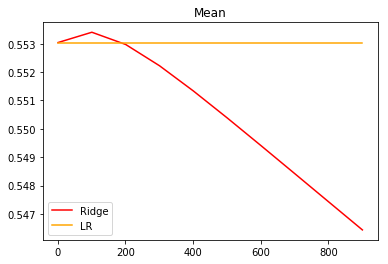

In [14]:
#跑alpha的学习曲线
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) #交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

### Lasso处理多重共线性

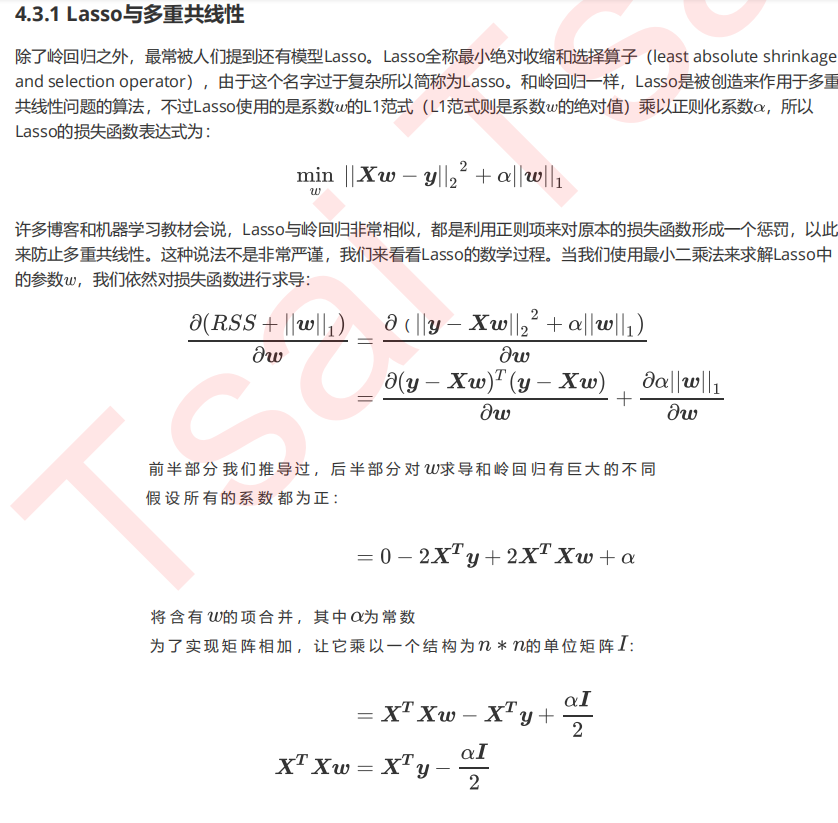

In [15]:
from sklearn.linear_model import Lasso

In [16]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score
from sklearn.datasets import  fetch_california_housing  as fh#加利福尼亚房价收集
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])
#线性回归进行拟合
reg = LR().fit(Xtrain,Ytrain) 
(reg.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494025,
 -10.780721617317683,
 62.64338275363768,
 5.216125353123053e-05,
 -0.3348509646333473,
 -41.309593789477155,
 -42.621095362084674]

In [20]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494154,
 -10.780721617317607,
 62.643382753637326,
 5.216125353271531e-05,
 -0.3348509646333586,
 -41.30959378947669,
 -42.62109536208426]

In [33]:
#Lasso进行拟合,因为sklearn中lasso不是最小二乘法得到而坐标是下降法得到的,所以可以设置max_iter
lasso_ = Lasso(alpha=0.0001,max_iter=10000).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[43.699829267735794,
 1.0218575079832604,
 -10.710677324559944,
 62.283573466835094,
 5.518630618508971e-05,
 -0.3347111020210154,
 -41.29669166449757,
 -42.6026225533961]

In [34]:
reg.score(Xtest,Ytest)

0.6043668160178818

In [23]:
Ridge_.score(Xtest,Ytest)

0.6043668160178814

In [24]:
lasso_.score(Xtest,Ytest)

0.6043668160178816

In [29]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[40.10568371834487,
 1.0936292607860147,
 -3.74237636102446,
 26.524037834897218,
 0.0003525368511503943,
 -0.3207129394887799,
 -40.06483047344841,
 -40.81754399163314]

In [30]:
lasso_.score(Xtest,Ytest)

0.5993452975210803

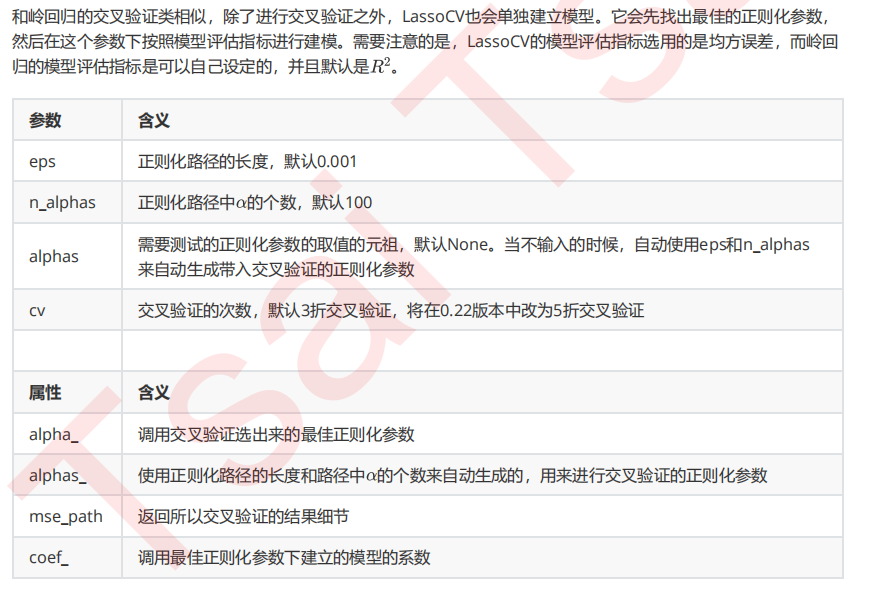

In [46]:
from sklearn.linear_model import LassoCV

In [47]:
alpha = np.logspace(-10,-2,200,base=10)
#自己建立的lasso来看

In [48]:
alpha

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [49]:
lasso_ = LassoCV(alphas=alpha,cv=5).fit(Xtrain,Ytrain)

In [50]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [51]:
lasso_.alpha_

0.0020729217795953697

In [52]:
lasso_.mse_path_ #所以交叉验证的结果(为均方误差)

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [53]:
lasso_.mse_path_.shape

(200, 5)

In [55]:
ls_ = LassoCV(eps=0.00001
              ,n_alphas=300
              ,cv=5).fit(Xtrain, Ytrain)
ls_.alpha_

0.0020954551690628535

In [56]:
ls_.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [57]:
ls_.alphas_.shape

(300,)

In [58]:
ls_.score(Xtest,Ytest)

0.6038915423819199

In [59]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

### 处理非线性回归问题

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [7]:
rnd = np.random.RandomState()
X=rnd.uniform(-3,3,size=100) #从-3，3之间取出一百个随机数
y = np.sin(X)+rnd.normal(scale=0.2,size=len(X))#random.normal生成size个服从正太分布的随机数

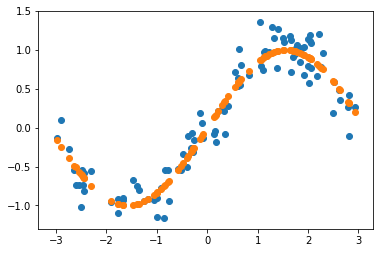

In [8]:
#散点图观察数据
plt.scatter(X,y)
plt.scatter(X,np.sin(X))
plt.show()

In [9]:
X=X.reshape(-1,1)

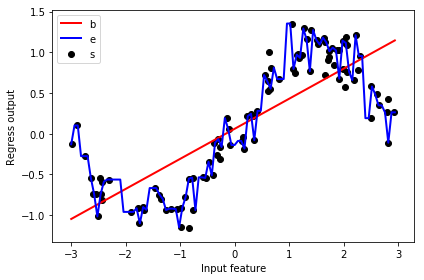

In [17]:
#决策树和线性回归建模
Linear = LinearRegression().fit(X,y)
DTR    = DecisionTreeRegressor(random_state=0).fit(X,y)

#画布
fig,axe = plt.subplots(1)

#创建新的测试集
line = np.linspace(-3,3,100,endpoint=False).reshape(-1,1)
axe.plot(line,Linear.predict(line),c='r',linewidth=2,label='linear regression')
axe.plot(line,DTR.predict(line),c='b',linewidth=2,label='DTR regression')
axe.scatter(X[:,0],y,c='k')
axe.legend('best')
axe.set_xlabel('Input feature')
axe.set_ylabel('Regress output')
plt.tight_layout()
plt.show()

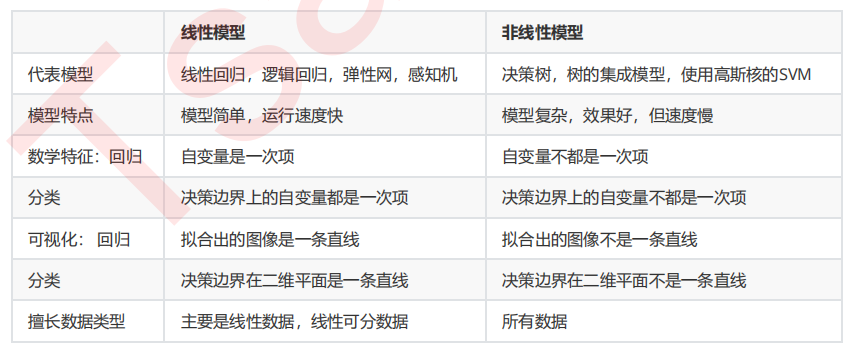

### 使用分箱:线性模型处理非线性数据

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
#返回一个稀疏矩阵（m，n_bins）每一列是一个分好的类别
#对每一个样本而言，它包含的分类(箱子)中它为1，其余分类为0

In [22]:
X_binned = enc.fit_transform(X)

In [24]:
X_binned.toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 

In [25]:
X

array([[-2.48026635],
       [ 1.99114611],
       [ 0.14743967],
       [-0.11066687],
       [ 0.2187813 ],
       [-1.35665996],
       [-0.08043424],
       [-2.4436401 ],
       [ 1.83198872],
       [ 1.66325224],
       [ 2.29362559],
       [ 0.6117402 ],
       [ 1.40314474],
       [-2.6063457 ],
       [-0.57858119],
       [-1.46379776],
       [ 0.13134716],
       [ 2.81918826],
       [ 0.41336875],
       [ 1.71044458],
       [-0.84698381],
       [ 0.62395044],
       [ 2.81509145],
       [-2.98445215],
       [ 2.01863073],
       [ 2.0648456 ],
       [ 0.82111756],
       [ 0.67024046],
       [ 2.04566968],
       [ 1.65757835],
       [ 1.78125142],
       [ 2.05457224],
       [ 1.99632617],
       [-0.32102161],
       [-1.76254052],
       [ 2.64278459],
       [ 2.62190524],
       [ 2.93355067],
       [ 2.50293919],
       [ 1.37577248],
       [ 2.18579108],
       [-0.26593967],
       [ 2.50777654],
       [ 0.55217096],
       [ 0.65320069],
       [-0

In [26]:
Linear_ = LinearRegression().fit(X_binned,y)

In [30]:
Linear_.predict(enc.fit_transform(line))

array([-0.54431818, -0.54431818, -0.54431818, -0.54431818, -0.54431818,
       -0.54431818, -0.54431818, -0.54431818, -0.54431818, -0.54431818,
       -0.81767963, -0.81767963, -0.81767963, -0.81767963, -0.81767963,
       -0.81767963, -0.81767963, -0.81767963, -0.81767963, -0.81767963,
       -0.88062204, -0.88062204, -0.88062204, -0.88062204, -0.88062204,
       -0.88062204, -0.88062204, -0.88062204, -0.88062204, -0.88062204,
       -0.26456836, -0.26456836, -0.26456836, -0.26456836, -0.26456836,
       -0.26456836, -0.26456836, -0.26456836, -0.26456836, -0.26456836,
        0.04955135,  0.04955135,  0.04955135,  0.04955135,  0.04955135,
        0.04955135,  0.04955135,  0.04955135,  0.04955135,  0.04955135,
        0.7838189 ,  0.7838189 ,  0.7838189 ,  0.7838189 ,  0.7838189 ,
        0.7838189 ,  0.7838189 ,  0.7838189 ,  0.7838189 ,  0.7838189 ,
        1.06065173,  1.06065173,  1.06065173,  1.06065173,  1.06065173,
        1.06065173,  1.06065173,  1.06065173,  1.06065173,  1.06

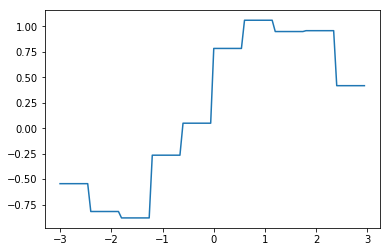

In [32]:
plt.plot(line,Linear_.predict(enc.fit_transform(line)))

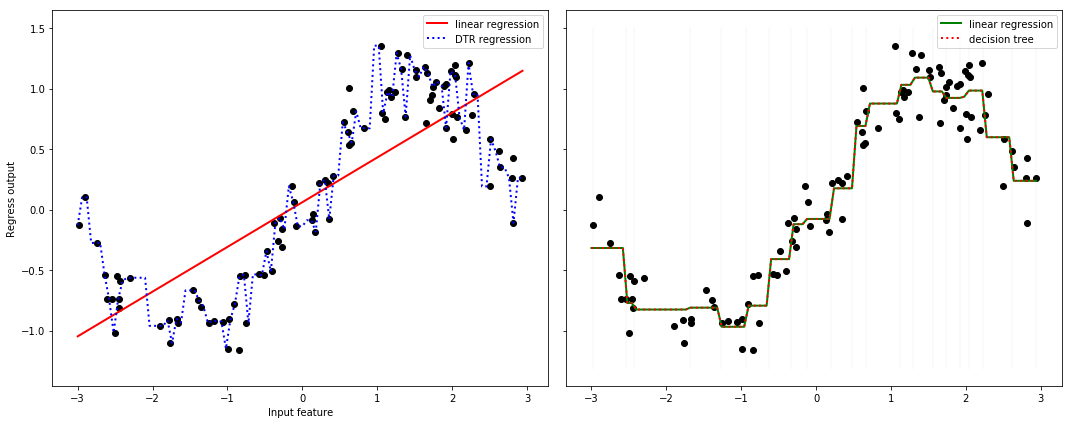

In [46]:
enc = KBinsDiscretizer(n_bins=20,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

#绘制两张图
fig,(axe1,axe2) = plt.subplots(ncols=2
                               ,sharey=True #让两张图共享y刻度和标签
                               ,figsize=(15,6))
axe1.plot(line,Linear.predict(line),c='r',linewidth=2,linestyle='-',label='linear regression')
axe1.plot(line,DTR.predict(line),c='b',linewidth=2,linestyle=':',label='DTR regression')
axe1.scatter(X[:,0],y,c='k')

Linear_ = LinearRegression().fit(X_binned,y)
DTR_=DecisionTreeRegressor().fit(X_binned,y)

axe2.plot(line,Linear_.predict(line_binned)
          ,linewidth=2
          ,color='green'
          ,linestyle='-'
          ,label='linear regression')
axe2.plot(line,DTR_.predict(line_binned)
         ,linewidth=2
         ,color='red'
         ,linestyle=':'
         ,label='decision tree')
axe2.scatter(X[:,0],y,c='k')

#绘制竖线
axe2.vlines(enc.bin_edges_[0] #x轴
            ,*plt.gca().get_ylim() #y轴上下界
            ,alpha=0.2
            ,linewidth=0.2)
axe1.legend(loc='best')
axe1.set_xlabel('Input feature')
axe1.set_ylabel('Regress output')
axe2.legend(loc='best')
plt.tight_layout()
plt.show()

In [47]:
Linear_.score(X_binned,y)  #箱子越多，分数越高，但是过拟合可能比较严重

0.9391849266190908

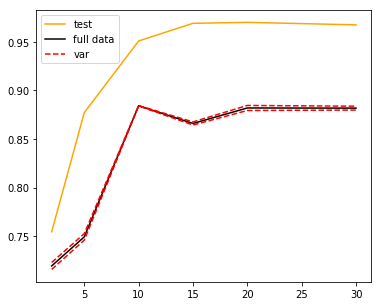

In [51]:
#选最好的箱子数目
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

### 多项式处理非线性数据的回归问题

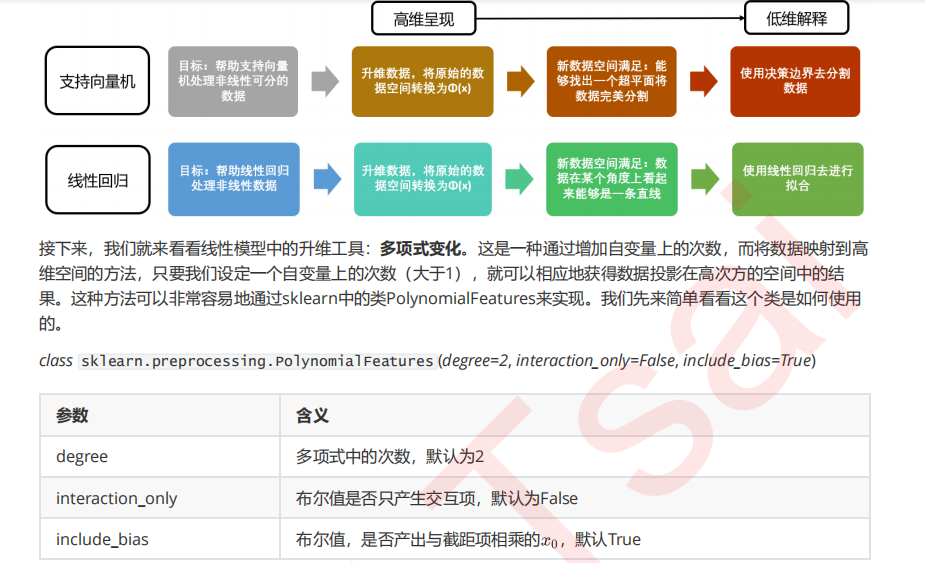

In [52]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [53]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [55]:
#二次多项式子，参数degree控制多项式次方
poly = PolynomialFeatures(degree=2)

In [56]:
#接口调用transform直接调用
X_ = poly.fit_transform(X)

In [57]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [58]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [59]:
#不产生截距项
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [61]:
xxx = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)
rng = np.random.RandomState(42)
y   = rnd.randn(3) #随机数
y

array([-1.29189568,  0.37831728,  1.26901611])

In [64]:
#线性回归,系数
LinearRegression().fit(xxx,y).coef_

array([ 0.50213258,  0.88516197, -0.21248651])

In [65]:
#线性回归，截距
LinearRegression().fit(xxx,y).intercept_

-2.4667037288629787

In [ ]:
#线性回归并没有将第一项当作截距，所以我们可以选择关闭多项式模型的include_bias，也可以关闭线性回归模型的fit_intercept

In [66]:
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([-4.02015759,  3.3518657 , -0.62360379])

In [67]:
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

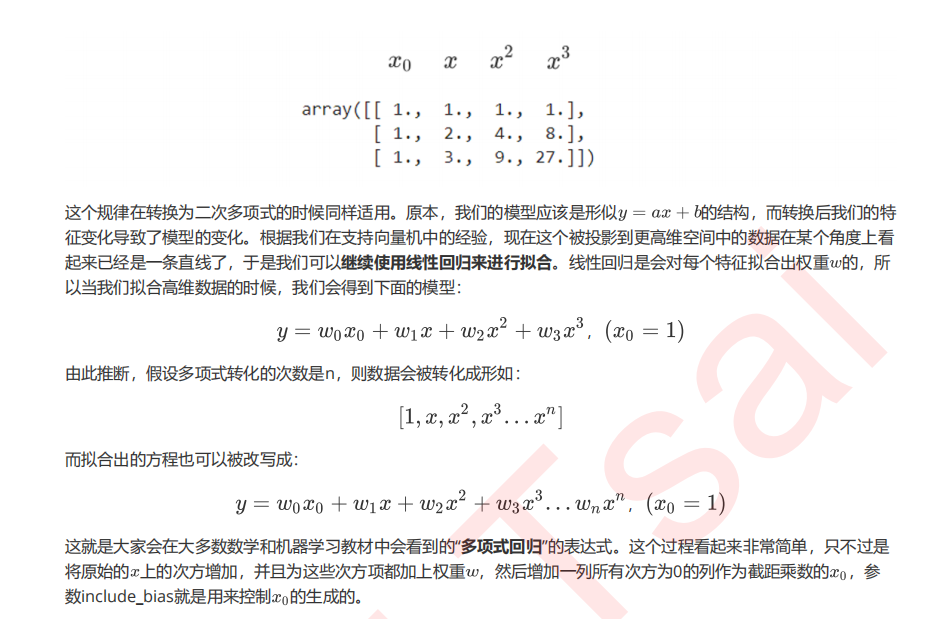

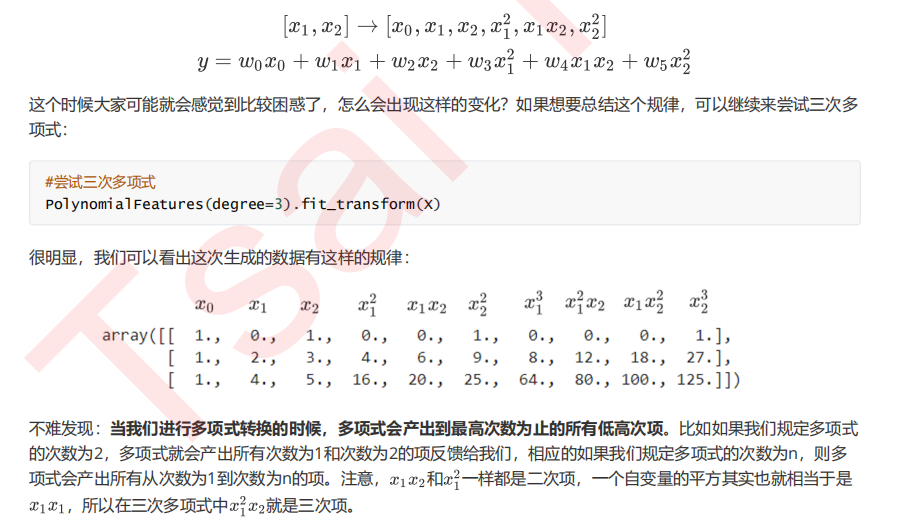

In [70]:
X = np.arange(1,7).reshape(3,2)

In [72]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

In [73]:
PolynomialFeatures(degree=3,interaction_only=True).fit_transform(X) #只生成交互项，消除共线性

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [74]:
#当原始数据的特征比较多的时候，多项式回归会生成无数特征

In [130]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np
rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,100)
y = np.sin(X)+rng.normal(size=len(X))/3
X=X.reshape(-1,1)
#创建测试数据
line  = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

In [131]:
#原始数据拟合训练集结果
Linear = LinearRegression().fit(X,y)
Linear.score(X,y)

0.6321161057689628

In [132]:
Linear.score(line,np.sin(line))

0.667418208296584

In [141]:
#给原始特征变为多项式,并打分训练集结果
PF_=PF(degree=5).fit(X)
X_=PF_.transform(X)
Linear_ = LinearRegression().fit(X_,y)
Linear_.score(X_,y)

0.8614258246632867

In [142]:
#给原始特征变为多项式,并打分测试数据拟合结果
line_=PF_.transform(line)
Linear_.score(line_,np.sin(line))

0.9771299134307277

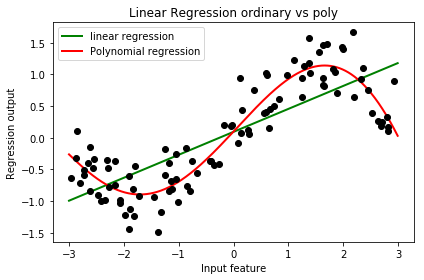

In [147]:
import matplotlib.pyplot as plt
d=5 #和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line) #放置画布
fig, ax1 = plt.subplots(1) #将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression") #将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') #其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

In [150]:
PF_.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']

In [166]:
#多项式跑加利福尼亚房价数据

poly.get_feature_names()
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)
reg = LinearRegression().fit(X,y)
reg.score(X,y)
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.7451090624023367
time:0.4564094543457031
R2:0.9739972306428696
time:11.527143239974976


## 总结：多项式回归本质是线性回归模型